<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>HATE SPEECH</h2>

In this project we will be trying to build a model that will help us predict wheter a tweet is containing hate speech or not.

For privacy all username replaced by user

The objective of this task is to detect hate speech in tweets. 
For the sake of simplicity, we say a tweet contains hate speech 
if it has a racist or sexist sentiment associated with it. 
So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, 
where label '1' denotes the tweet is racist/sexist and 
label '0' denotes the tweet is not racist/sexist.

For privacy all username replaced by user

The objective of this task is to detect hate speech in tweets. 
For the sake of simplicity, we say a tweet contains hate speech 
if it has a racist or sexist sentiment associated with it. 
So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, 
where label '1' denotes the tweet is racist/sexist and 
label '0' denotes the tweet is not racist/sexist.

<h2>
Import libraries
</h2>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

<h2>Import data and initial view</h2>

In [2]:
# read data from csv files to lists
# Dataset: https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech?select=train.csv

train = pd.read_csv('train_tweet.csv')

#size of lists

print(train.shape)

(31962, 3)


In [3]:
# sample type

train.head(15)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
# looking for any null value

train.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [5]:
# checking out the neutral comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
# checking out the negative comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<AxesSubplot:>

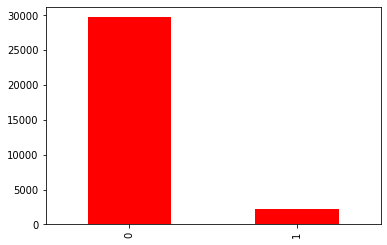

In [7]:
# checking the neutral-negative values in lable (data imbalance)

train['label'].value_counts().plot.bar(color = 'red', figsize = (6, 4))

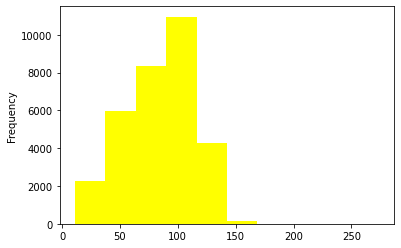

In [8]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'yellow', figsize = (6, 4))

In [9]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [10]:
# details of data distribution via label

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

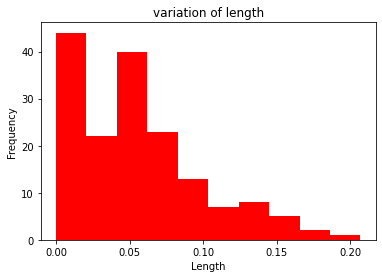

In [11]:
# details of data distribution via len

train.groupby('len').mean()['label'].plot.hist(color = 'red', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

<h2>
Removing stopwords, Counting and Creating frequency dictionary 
</h2>

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

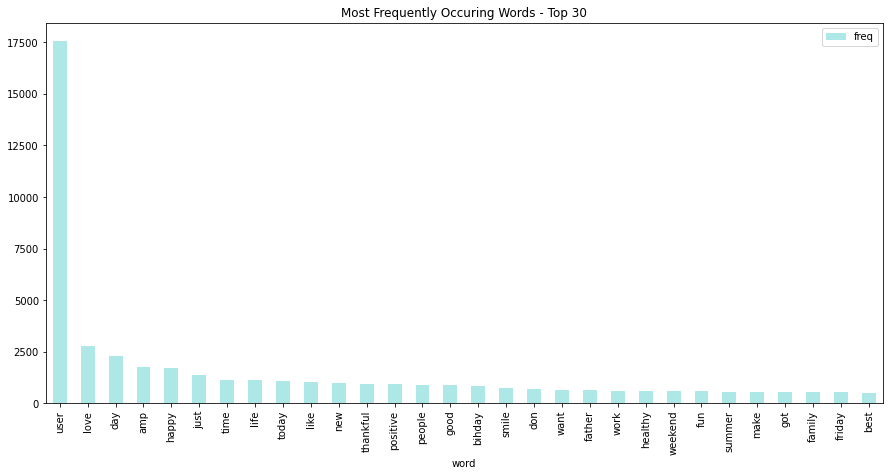

In [12]:
# Removing stopwords and getting frequency of data

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

# Word frequency dictionary
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = '#ADE8E6')
plt.title("Most Frequently Occuring Words - Top 30")


<h2>
Visualizing dataset
</h2>

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

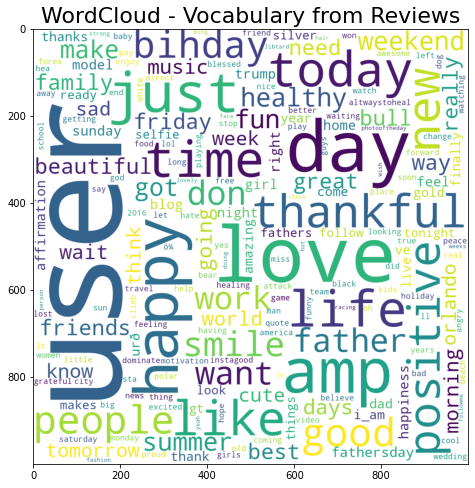

In [13]:
# Visualization of words based on frequency

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

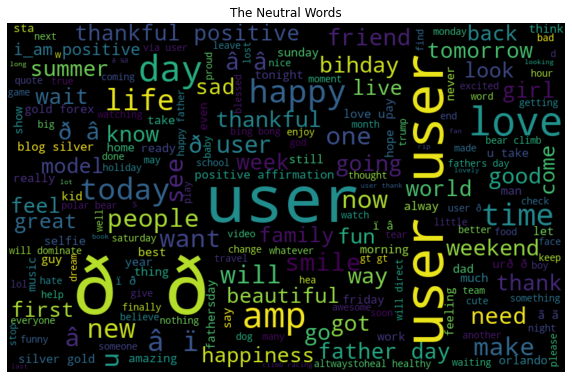

In [14]:
# Visualization of all neutral words based on frequency

normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


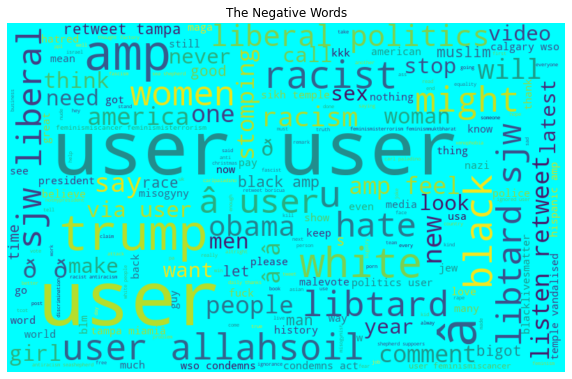

In [15]:
# Visualization of all negative words based on frequency

negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


<h2>
Hashtag processing
</h2>

In [16]:
# collecting the hashtags

import re

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [17]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

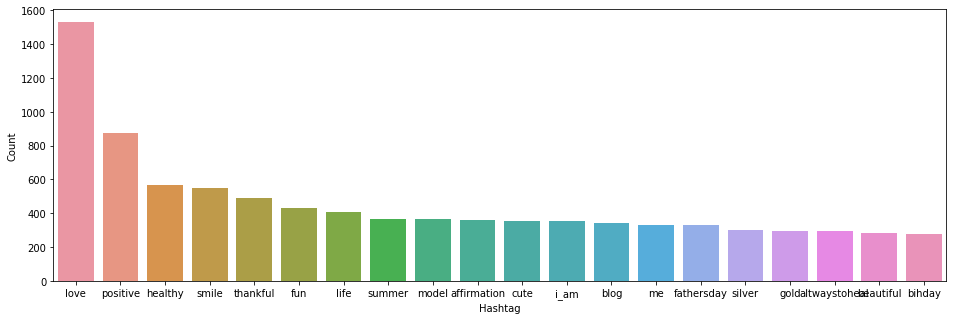

In [18]:
import nltk


a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

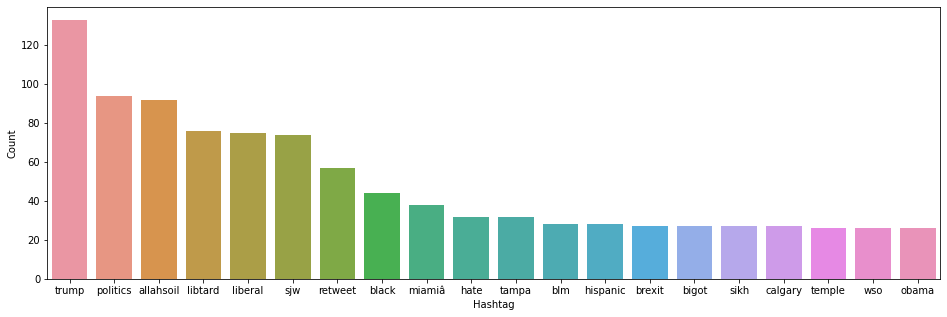

In [19]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

<h2>
tokenizing and vecotrizing the words
</h2>

In [20]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 6, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6108907, 8411580)

In [21]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6456935405731201),
 ('#boardgames', 0.6079200506210327),
 ('#prosecco', 0.5996020436286926),
 ('#wanderlust', 0.5991560220718384),
 ('#travelling', 0.5952969789505005),
 ('7!', 0.5858844518661499),
 ('sister!!', 0.5808708667755127),
 ('#demoday', 0.5801109671592712),
 ('bay.', 0.5783376693725586),
 ('roast', 0.5780814290046692)]

In [22]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.697177529335022),
 ('ways.', 0.694614052772522),
 ('rights,', 0.6920651793479919),
 ('politicizing', 0.6889668107032776),
 ('roughly', 0.6870567798614502),
 ('acknowledge', 0.6852014064788818),
 ('spewing', 0.6810737252235413),
 ('#merica', 0.6775760650634766),
 ('inflict', 0.6746910810470581),
 ('oâ\x80¦', 0.6745113134384155)]

In [23]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7122595310211182),
 ('mytraining', 0.7073631882667542),
 ('training"', 0.6923970580101013),
 ('app,', 0.6781827211380005),
 ('app', 0.6041862368583679),
 ('"my', 0.5918577909469604),
 ('ios', 0.5886970162391663),
 ('humans.', 0.5804997682571411),
 ("domino's", 0.5730862021446228),
 ('mp3', 0.5696414709091187)]

In [24]:
model_w2v.wv.most_similar(negative = "hate")

[('â\x9c\x88ï¸\x8f', 0.050973694771528244),
 ('ð\x9f\x92\x8b', 0.030254213139414787),
 ('ð\x9f\x8d»', 0.02098049409687519),
 ('board', 0.01919415406882763),
 ('@', 0.017888598144054413),
 ('#foodie', 0.010883492417633533),
 ('#css', 0.0072570485062897205),
 ('#travel', 0.00652215164154768),
 ('#relax', 0.0007302926387637854),
 ('#enjoy', -0.0004965404514223337)]

In [25]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [26]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

<h2>
Removing unwanted patterns
</h2>

In [27]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaves\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

<h2>
Bag of words
</h2>

In [76]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(X.shape)
print(y.shape)


(31962, 2500)
(31962,)


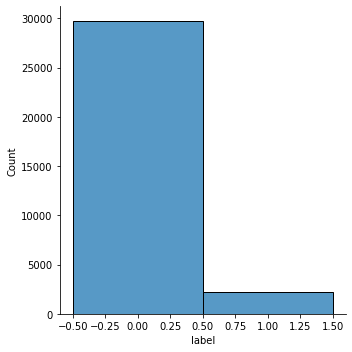

In [77]:
sns.displot(X, x=y, discrete=True)

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as PL
#04->05
over = SMOTE(sampling_strategy=0.4)
#05->04
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('over',over),('under', under)]
pipeline = PL(steps=steps)

X, y = pipeline.fit_resample(X, y)

(35664, 2500)
(35664,)


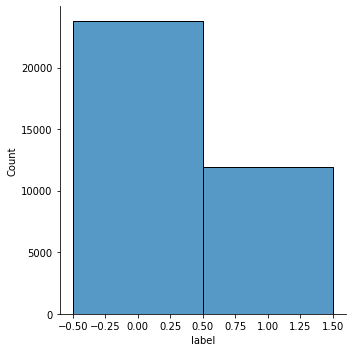

In [80]:
print(X.shape)
print(y.shape)
sns.displot(X, x=y, discrete=True)

(24964, 2500)
(10700, 2500)
(24964,)
(10700,)


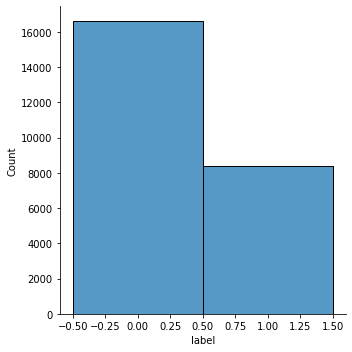

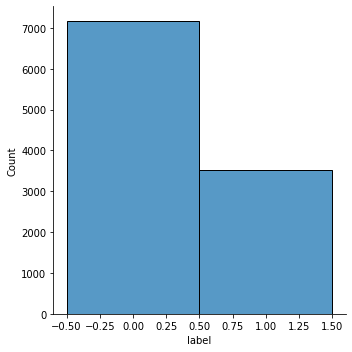

In [81]:
# splitting the training data into train and valid(testing) sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

sns.displot(X_train, x=y_train, discrete=True)
sns.displot(X_test, x=y_test, discrete=True)

<h2>
standardization
</h2>

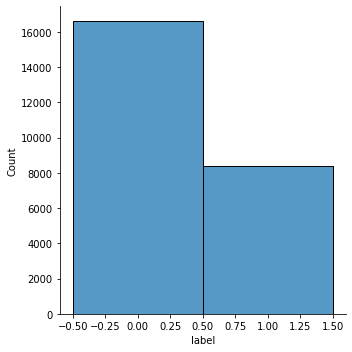

In [83]:
# # standardization

# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# sns.displot(X_train, x=y_train, discrete=True)


<h2>
Models
</h2>

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Training Accuracy : 0.9918683989157865
Testing Accuracy : 0.9165848871442591
F1 score : 0.8823878236805692


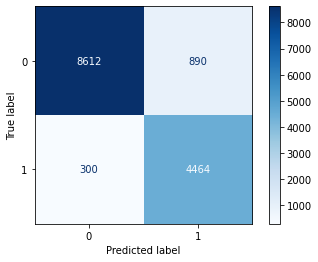

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      9502
           1       0.83      0.94      0.88      4764

    accuracy                           0.92     14266
   macro avg       0.90      0.92      0.91     14266
weighted avg       0.92      0.92      0.92     14266



In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# calculating the f1 score for the testing set
f1_RF = f1_score(y_test, y_pred)
print("F1 score :", f1_RF)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred))

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Training Accuracy : 0.9488269931769324
Testing Accuracy : 0.9297630730407963
F1 score : 0.8977133523887301


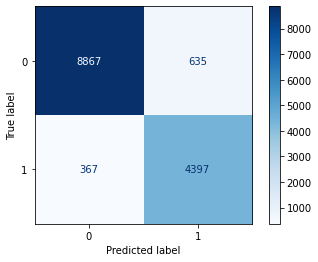

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      9502
           1       0.87      0.92      0.90      4764

    accuracy                           0.93     14266
   macro avg       0.92      0.93      0.92     14266
weighted avg       0.93      0.93      0.93     14266



In [43]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# calculating the f1 score for the testing set
f1_LR = f1_score(y_test, y_pred)
print("F1 score :", f1_LR)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred))

In [44]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Training Accuracy : 0.9918683989157865
Testing Accuracy : 0.8972381887004066
F1 score : 0.8576422606331326


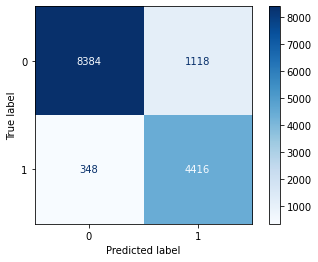

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      9502
           1       0.80      0.93      0.86      4764

    accuracy                           0.90     14266
   macro avg       0.88      0.90      0.89     14266
weighted avg       0.91      0.90      0.90     14266



In [45]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# calculating the f1 score for the testing set
f1_DT = f1_score(y_test, y_pred)
print("F1 score :", f1_DT)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred))

In [76]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Training Accuracy : 0.9629131149992523
Testing Accuracy : 0.9302377747869
F1 score : 0.8950742240215924


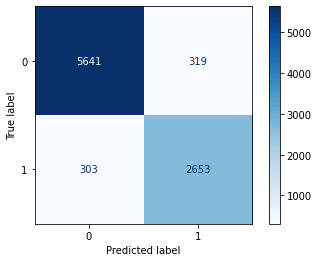

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5960
           1       0.89      0.90      0.90      2956

    accuracy                           0.93      8916
   macro avg       0.92      0.92      0.92      8916
weighted avg       0.93      0.93      0.93      8916



In [77]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# calculating the f1 score for the testing set
f1_SV = f1_score(y_test, y_pred)
print("F1 score :", f1_SV)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred))

<h2>Model Comparison</h2>
Since the amount of data labeled as hate speech is small, the algorithm could simply guess text doesn't contain hate speech and still get a high accuracy score.

That way, F1 Score takes into account precision and recall. And that's the measure we will be using to compare between models.

<AxesSubplot:>

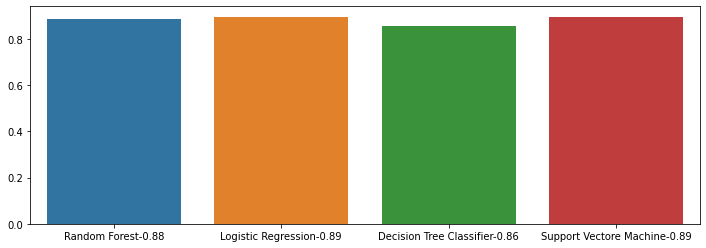

In [78]:
models = ['Random Forest-0.88', 'Logistic Regression-0.89', 'Decision Tree Classifier-0.86', "Support Vectore Machine-0.89"]
model_f1 = [f1_RF, f1_LR, f1_DT, f1_SV]

plt.figure(figsize=(12,4))
sns.barplot(x = models, y=model_f1)